In [3]:
from random import randint
import math
import numpy as np
import workshop_utils as ws
import matplotlib.pyplot as plt

# Mathematics with Numpy

Welcome to day two of the AI pool!\
Now that you have mastered the basics of Python, you will be able to use this language to perform complex mathematical operations.

‚ö†Ô∏è Make sure that you have executed the above cell without errors or you will not be able to follow the notebook properly !

### It's time to take the plunge üöÄ

## 1. Native math vs NumPy

![Numpy logo](./images/numpy.png)

First, you may wonder what Numpy is?

> NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

üîó [NumPy](https://numpy.org/)  
üîó [NumPy Reference](https://numpy.org/doc/stable/reference/index.html#reference)  

In [4]:
"""
This function displays the two variables passed as parameters whatever their type
"""
def display_variables(x, y):
    x, y = str(x), str(y)
    print(x, '->', y)

---

In [5]:
x = -8
y = math.fabs(x)

display_variables(x, y)
assert y == 8
print('Math library seems to work well with number')

-8 -> 8.0
Math library seems to work well with number


In [6]:
x = [-8, 10, -3]
#y = math.fabs(x)

The above code does not work. Indeed the math library can only handle numbers, but we're trying to give it an array of numbers !

```
TypeError: must be real number, not list
```

You can comment the line that causes this error so that it doesn't bother you anymore !

That is why, for matrix computations, we use another module called `numpy` !

In [7]:
y = np.abs(x)

display_variables(x, y)
assert np.all(y >= 0)
print('NumpPy library seems to work well with array')

[-8, 10, -3] -> [ 8 10  3]
NumpPy library seems to work well with array


NumPy also works very well with numbers, so you can use its methods when dealing with numbers as well !

## 2. Function implementation with NumPy

NumPy not only allows to perform operations between matrices, it also allows to generate data :

---

> Try to use a numpy method to complete the `get_data` method which is defined below :

In [8]:
def get_data(batch_size = 30):
    "TODO: this function must return a list containing 30 evenly spaced numbers"
    return np.linspace(0, batch_size, num=10)

print(get_data())

[ 0.          3.33333333  6.66666667 10.         13.33333333 16.66666667
 20.         23.33333333 26.66666667 30.        ]


If you can't figure out which NumPy function to use, you can follow [this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

---

> Try to implement the sigmoid function whose formula is :

$$ sigmoid(x) = \frac{1}{1+e^{-x}} $$

üîó [Sigmoid function on Wikipedia](https://en.wikipedia.org/wiki/Sigmoid_function)

In [9]:
def sigmoid(x):
    "TODO: implement sigmoid function with NumPy"
    return np.divide(1, 1 + np.exp(x * -1))

assert sigmoid(1) == 0.7310585786300049
print('Bravo, the function has been correctly implemented üöÄ')

Bravo, the function has been correctly implemented üöÄ


> **WARNING** : we are using the `get_data()` method to generate the data which we will store inside x\
> **WARNING** : unless you have already done so, modify your `get_data()` method so that it starts counting at -10 and ends at 10

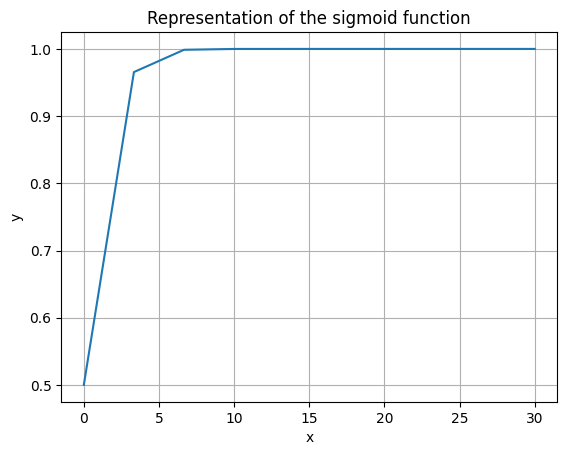

In [10]:
x = get_data()
ws.display_function(x, sigmoid)

---

> Try to implement the Mean Squared Error function whose formula is

$$ MSE(\hat{y}, y) = \frac{1}{n} \sum_{i=0}^{n} (y^{i} - \hat{y}^{i})^2 $$

> This function measures the difference between two sets of data, the larger the result the more different the data are

üîó [Mean squared Error on Wikipedia](https://en.wikipedia.org/wiki/Mean_squared_error)

In [11]:
def mse(x, y):
    if (type(x) == np.ndarray and type(y) == np.ndarray):
        assert len(x) == len(y)
        somme = 0
        for i in range(0, len(x)):
            somme = np.add(somme, np.square(np.subtract(x[i], y[i])))
        return np.round(np.multiply(np.divide(1, len(x)), somme))
    return np.round(np.square(np.subtract(x, y)))

print(mse(x, x + 3))
assert mse(10, 12) == 4
assert mse(x, x + 3) == 9
print('Bravo, the function has been correctly implemented üöÄ')

9.0
Bravo, the function has been correctly implemented üöÄ


Since the functions have been implemented with NumPy, they can be used with both numbers and arrays.

## 3. Gradient descent

Try to implement the following functions:

 $$ f(x)=x^{2} $$
  
 $$ g(x)=
\begin{equation*} \lvert x \rvert = \left\{
        \begin{array}{ll}
            \frac{2}{3}{(-x)}^2+2x & \quad x < 0 \\
            \frac{1}{2}{x}^2-2x & \quad x \geq 0
        \end{array}
    \right.
\end{equation*} $$



In [12]:
def f(x):
    return np.square(x)

def g(x):
    if type(x) == np.ndarray:
        new = np.empty(len(x))
        for i in range(0, len(x)):
            if x[i] < 0:
                right = np.multiply(2, x[i])
                center = np.square(np.multiply(x[i], -1))
                left = np.divide(2, 3)
            else:
                right = np.multiply(-2, x[i])
                center = np.square(x[i])
                left = np.divide(1, 2)
            new[i] = np.add(np.multiply(left, center), right)
        return new
    if x < 0:
        right = np.multiply(2, x)
        center = np.square(np.multiply(x, -1))
        left = np.divide(2, 3)
    else:
        right = np.multiply(-2, x)
        center = np.square(x)
        left = np.divide(1, 2)
    return np.add(np.multiply(left, center), right)

assert f(4) == 16
print(g(-3))
assert g(-3) == 0
assert g(2) == -2
print('Bravo, the functions has been correctly implemented üöÄ')

0.0
Bravo, the functions has been correctly implemented üöÄ


---

We will use matplotlib to visualize the two functions you have implemented

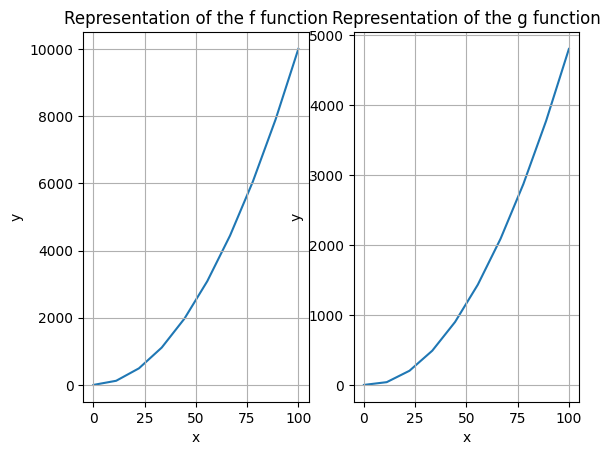

In [13]:
x = get_data(100)
ws.display_functions(x, f, g)

---

Try to implement the following functions:
 * the derivative of $f$
 * the derivative of $g$
 
> If you don't know how to calculate a derivative, feel free to look it up.\
> However, don't get stuck on it for too long, this isn't a math pool !

In [14]:
def f_dx(x):
    pass

def g_dx(x):
    pass

assert f_dx(4) == 8
assert g_dx(-3) == -2
assert g_dx(3) == 1
#ws.display_functions(x, f, g, f_dx, g_dx)
print('Bravo, the functions has been correctly implemented üöÄ')

AssertionError: 

---

We will now try to find the values for which a function is at its local minimum. To do this we will use the gradient descent algorithm

$$ \theta_{j+1} = \theta_j - \alpha \times \frac{\partial f}{\partial x} $$

2D gradient descent | 3D gradient descent
--------------------|--------------------
![2D gradient descent](./images/gradient-descent-2d.png) | ![3D gradient descent](./images/gradient-descent-3d.png)

üîó [Gradient descent on Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent)

* Initial value: a random initial value where the algorithm is going to start
* Epochs: number of iteration the algorithm will perform
* Learning rate: a tuning parameter that determines the step size at each iteration
* Steps number: number of steps that will be saved for display

In [16]:
EPOCHS = 100
LR = 0.1
STEPS_NUMBER = 100

def gradient_descent(value, derivative, epochs = EPOCHS, lr = LR, steps_number = STEPS_NUMBER): 
    for epoch in range(epochs):
        "TODO: the value must be modified according to the gradient descent algorithm"
        pass
    return value

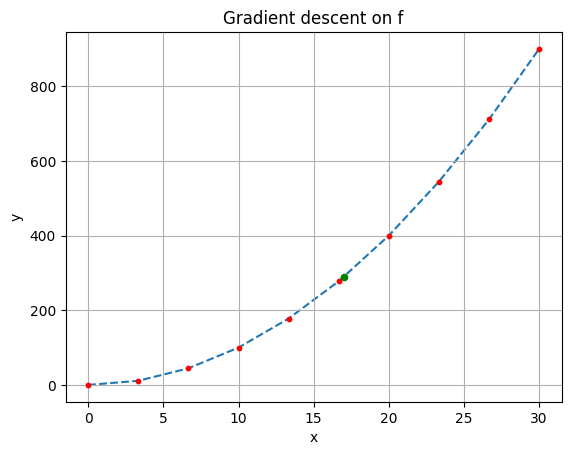

Minimum value of the function found for x = 17.00 -> y = 289.00


In [17]:
x = get_data()
start_value = randint(x[0], x[-1])
min = gradient_descent(start_value, f_dx)

ws.gradient_descent_visualisation(x, f, min)
print('Minimum value of the function found for x = %.2f -> y = %.2f' % (min, f(min)))

Don't hesitate to modify the hyper-parameters of the gradient descent, you have to find the right balance between precision and computation cost. 

‚ö†Ô∏è A bad configuration of one of these parameters can make you miss the optimal result!

## 4. Local minima issue

We find the minimum of the function used in the example. However, our algorithm will not be sufficient for all functions.  
As the following illustration shows, non-convergent functions can have local minima.

![Global minima illustration](./images/global-minima.png)

#### üí° To get past this problem, we will run the algorithm for many function parameters and not just one starting value

üîó [Non-Convex Optimization in Deep Learning](https://medium.com/swlh/non-convex-optimization-in-deep-learning-26fa30a2b2b3)

In [ ]:
x = get_data()
min = gradient_descent(x, g_dx)

map_xy = ?

ws.gradient_descent_visualisation(get_data(), g, min)
print('Minimum value of the function found with y = %.2f' % np.min(map_xy(min)))

As you can see, this function has two local minima, one towards $ x=-1.5 $ and the other towards $ x=2 $.

---

### üéâ Congratulations! You have completed the first notebook of the day.  
I hope this first part went well and that you didn't get scared by the formulas.

‚è≠Ô∏è Now that you have learned the gradient descent algorithm, you can use it to minimize a function and thus improve the results of a machine learning model.